In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [120]:
HR=pd.read_csv("/Users/souravghoshhansda/Library/CloudStorage/OneDrive-Personal/data exploration/aug_train.csv")

In [121]:
HR.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [122]:
HR.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,Female,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [123]:
HR['enrollee_id'].unique()

array([ 8949, 29725, 11561, ..., 24576,  5756, 23834])

In [124]:
HR['city'].unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [125]:
HR.enrollee_id.value_counts()

enrollee_id
8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: count, Length: 19158, dtype: int64

In [126]:
HR.city.value_counts()

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

In [127]:
HR.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [128]:
HR.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [129]:
HR.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4498
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [130]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in HR.columns: #Iterates through each column in the DataFrame.
    if len(HR[column].unique()) <= 30:#Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {HR[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {HR[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

gender : ['Male' 'Female' nan 'Other']
gender : gender
Male      13216
Female     1253
Other       191
Name: count, dtype: int64
relevent_experience : ['Has relevent experience' 'No relevent experience']
relevent_experience : relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64
enrolled_university : ['no_enrollment' 'Full time course' nan 'Part time course']
enrolled_university : enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
education_level : ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
education_level : education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64
major_discipline : ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
major_discipline : major_discipline
STEM               14492
Humanities           6

In [131]:
categorical_col

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'target']

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='target', ylabel='count'>

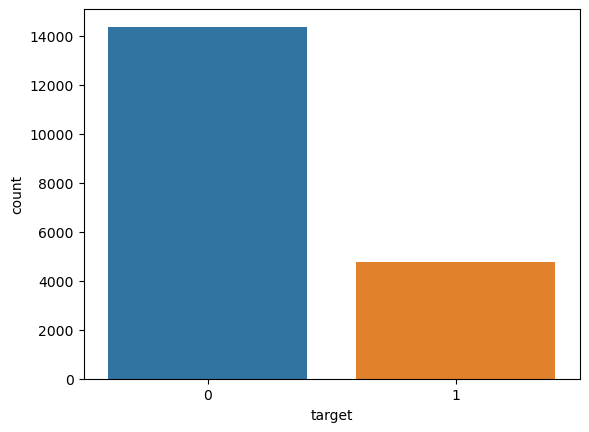

In [132]:
sns.countplot(x="target",data=HR)

The dataset is imbalanced so we need to apply smote

when we mention target=0 in HR attrition, it means that the group of employees who have not left the company or have not experienced attrition.

In HR analytics or employee churn prediction, a common task is to build a predictive model to identify factors or features that contribute to attrition and predict which employees are more likely to leave the organization.


The target variable is a categorical binary outcome(0 or 1) indicating whether an employee has left(1) or not left(0).

In [133]:
HR["target"]=HR["target"].astype(str)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshha

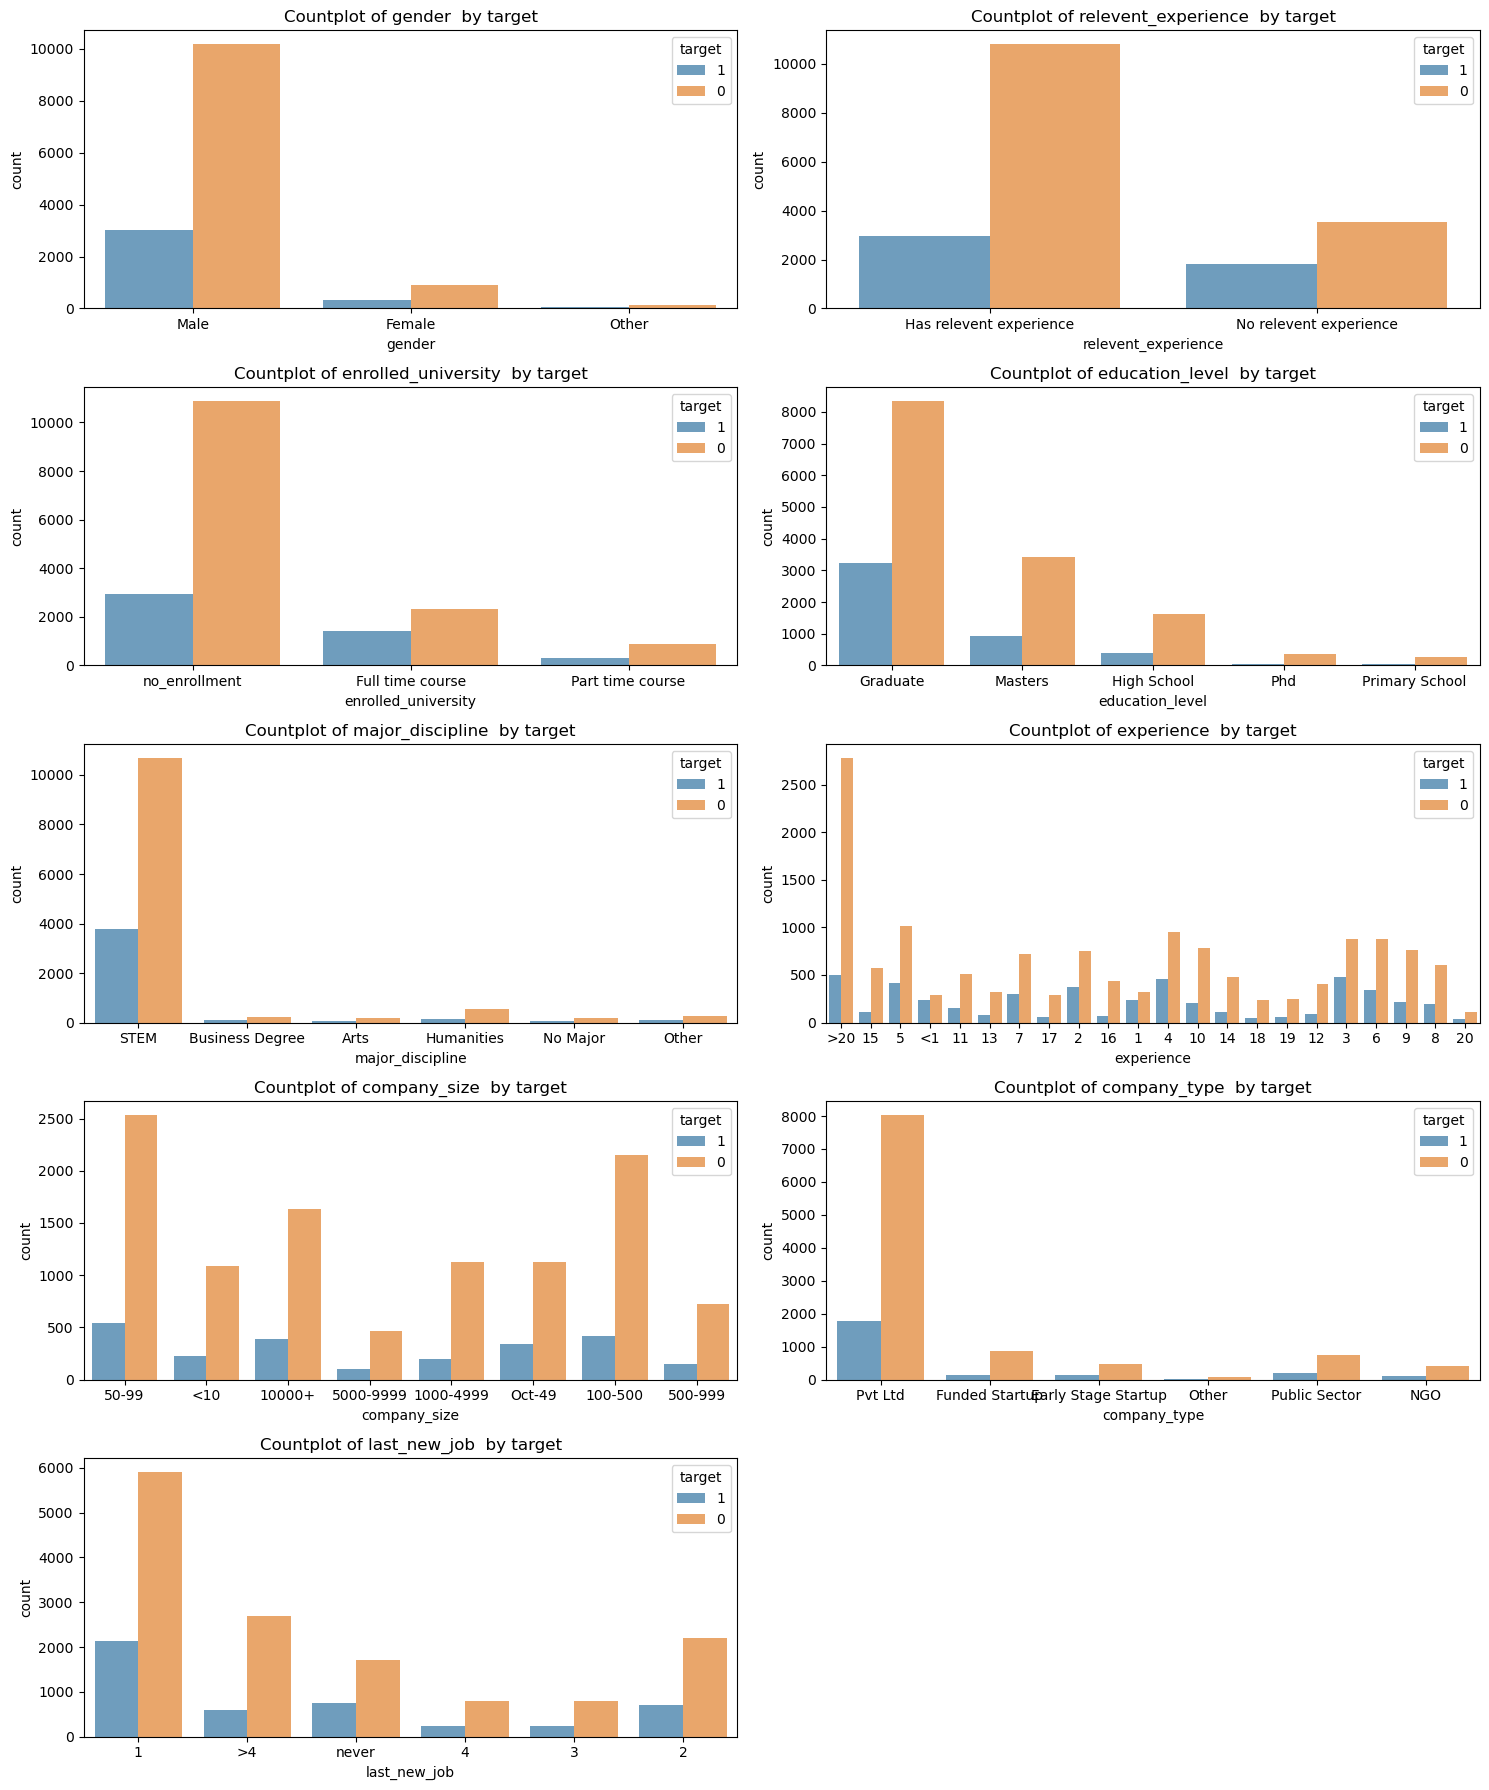

In [134]:
plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 
            'major_discipline', 'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=HR)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

#checking the inter relationship of all the features with the target variable to understand the importance of the feature columns
features = ['gender','relevent_experience','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)#3 rows, 3 columns
    sns.countplot(x=feature, hue='target', data=HR)
    plt.title(f'Count plot of {feature} with Target')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshha

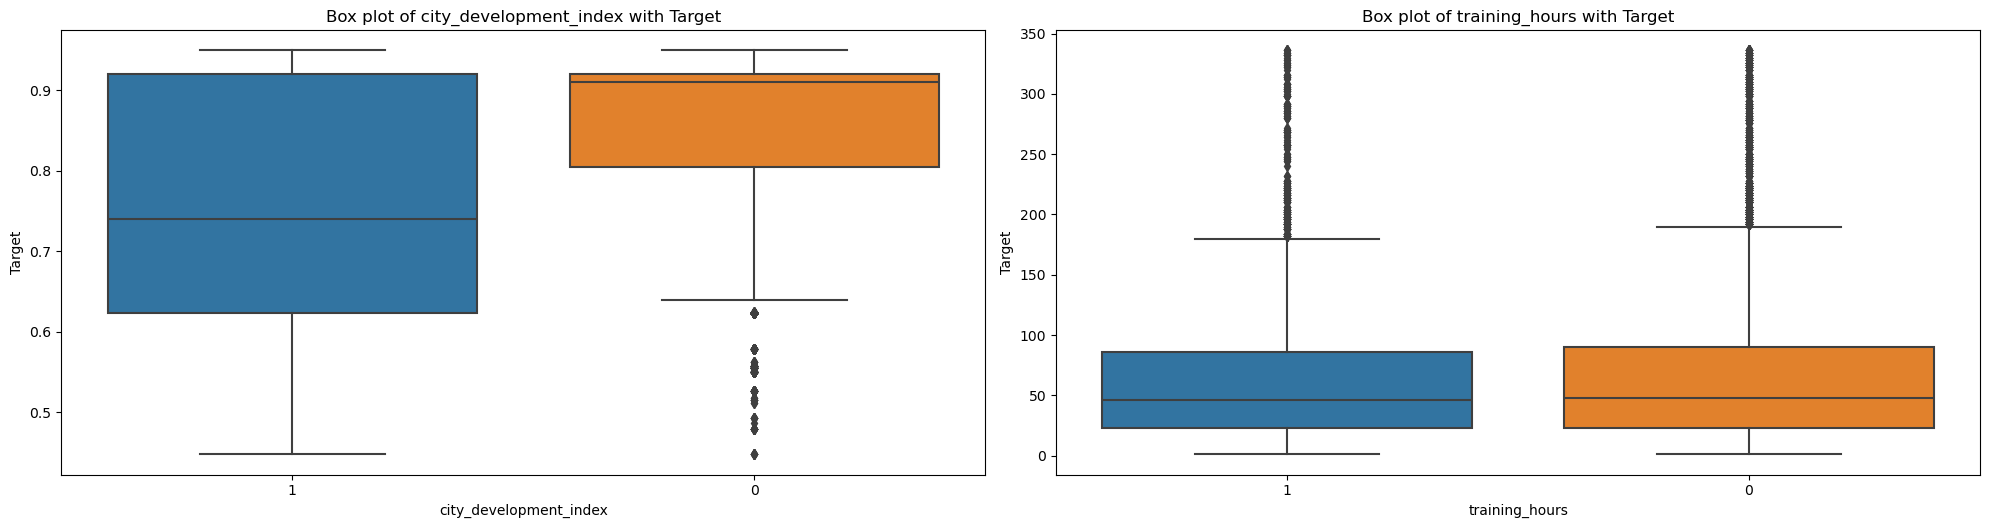

In [135]:
features = ['city_development_index', 'training_hours']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)#5rows, 2 columns
    sns.boxplot(y=feature, x='target', data=HR)
    plt.title(f'Box plot of {feature} with Target')
    plt.xlabel(feature)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()

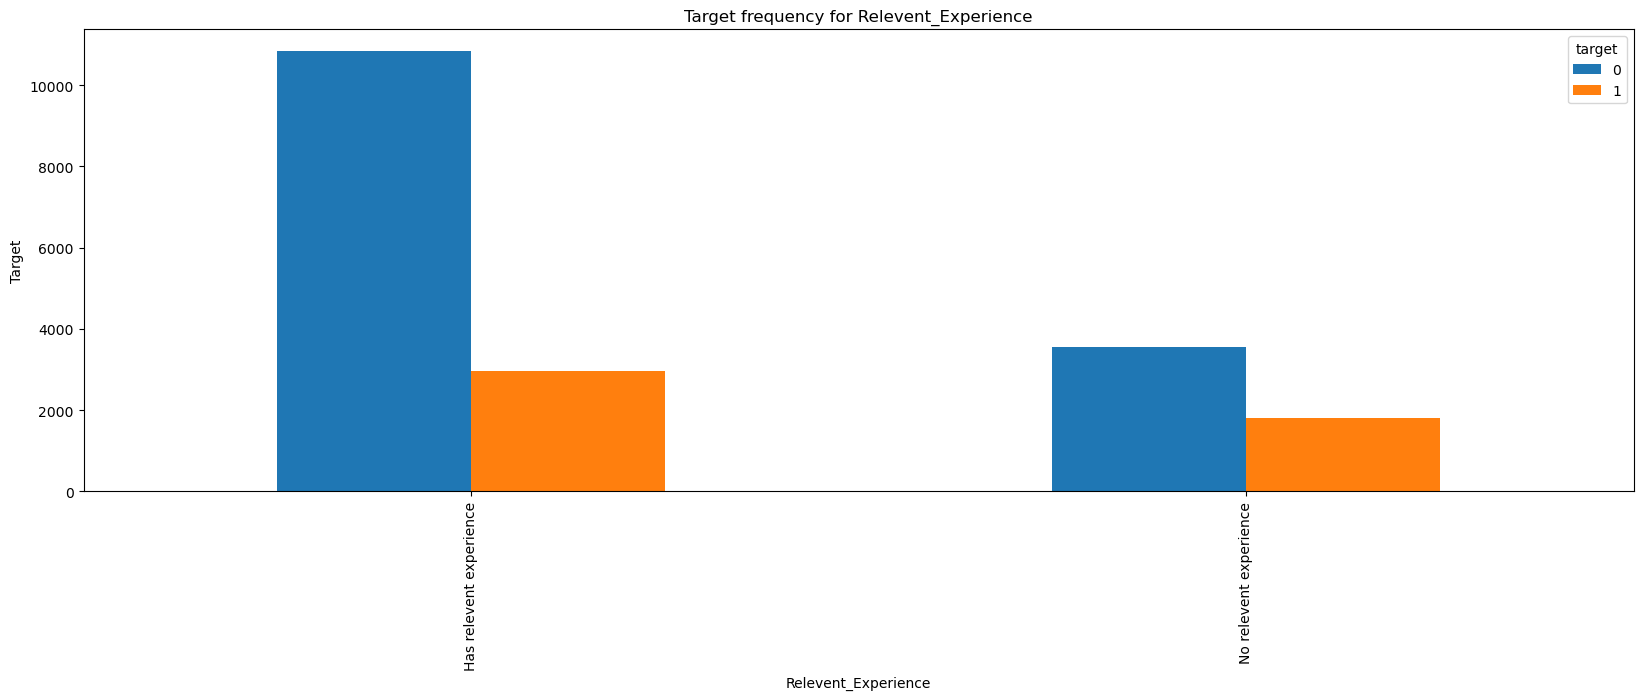

In [136]:
#check the overall distribution of relevent_experience vs target using crosstab
pd.crosstab(HR.relevent_experience,HR.target).plot(kind="bar",figsize=(20,6))
plt.title('Target frequency for Relevent_Experience')
plt.xlabel('Relevent_Experience')
plt.ylabel('Target')
plt.savefig('Target according to Relevent_Experience.png')#how to save an image in python

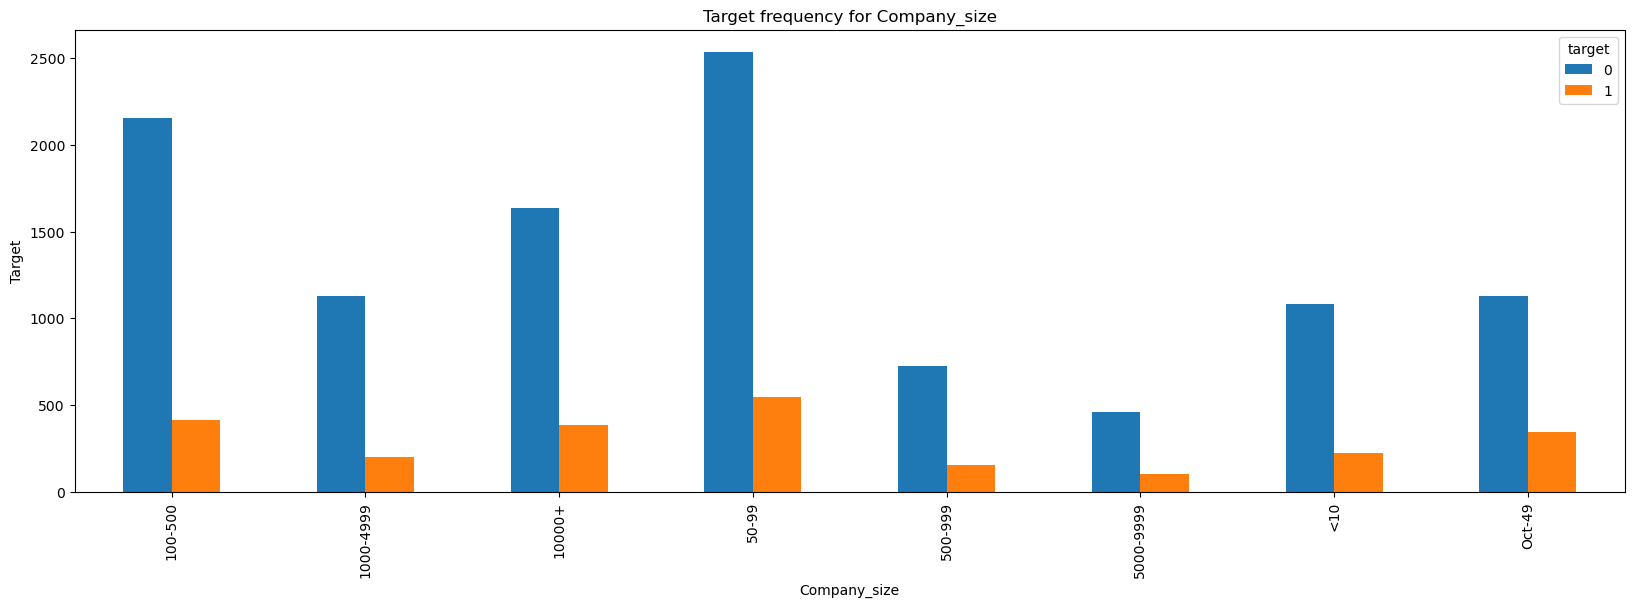

In [137]:
#check the overall distribution of company_size vs target using crosstab
pd.crosstab(HR.company_size,HR.target).plot(kind="bar",figsize=(20,6))
plt.title('Target frequency for Company_size')
plt.xlabel('Company_size')
plt.ylabel('Target')
plt.savefig('Target according to Company_size.png')#how to save an image in python

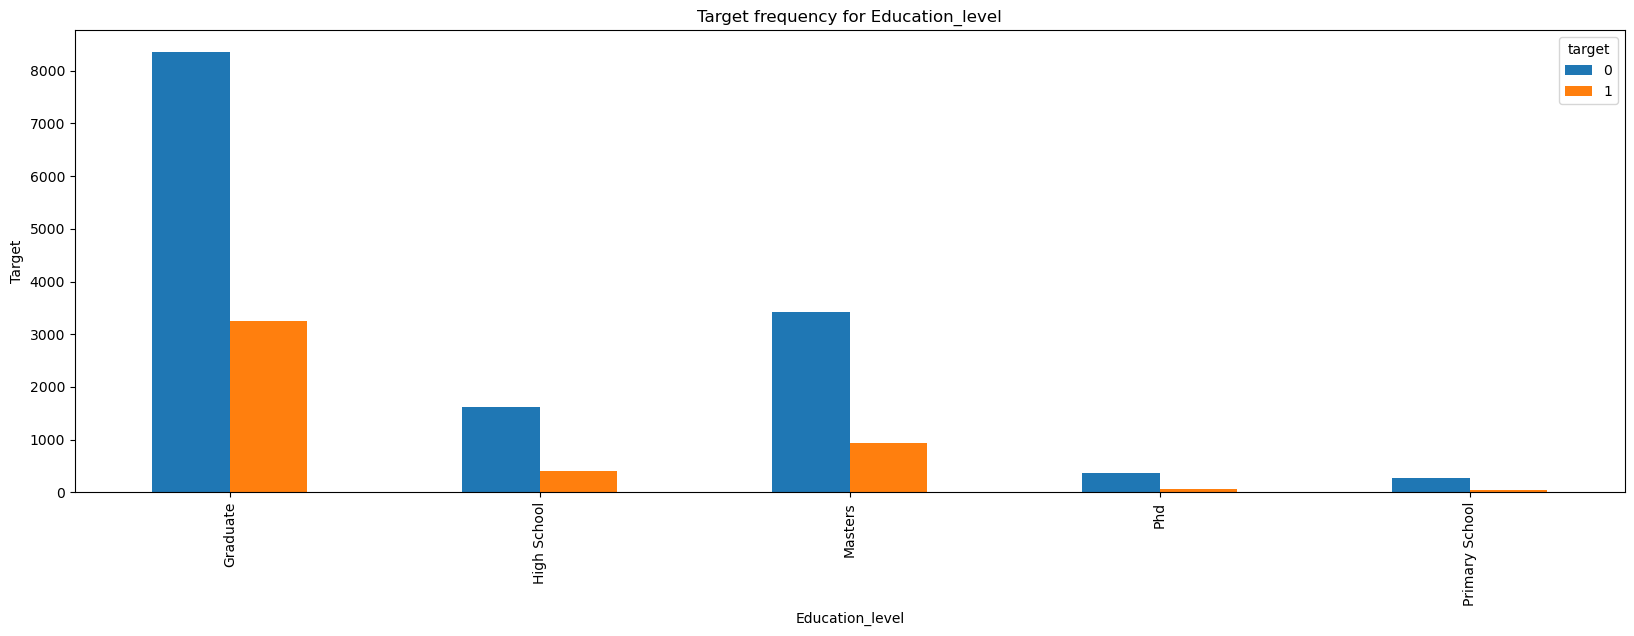

In [138]:
#check the overall distribution of Education_level vs target using crosstab
pd.crosstab(HR.education_level,HR.target).plot(kind="bar",figsize=(20,6))
plt.title('Target frequency for Education_level')
plt.xlabel('Education_level')
plt.ylabel('Target')
plt.savefig('Target according to Education_level.png')#how to save an image in python

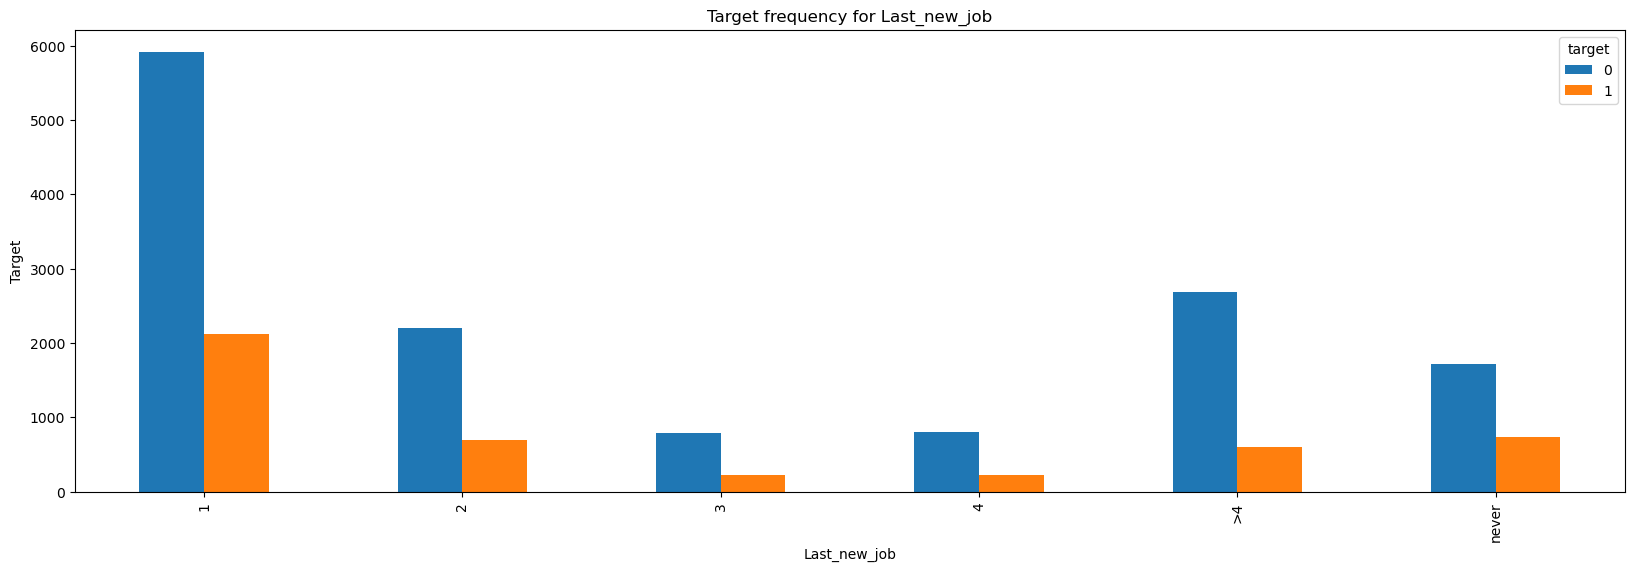

In [139]:
#check the overall distribution of Last_new_job vs target using crosstab
pd.crosstab(HR.last_new_job,HR.target).plot(kind="bar",figsize=(20,6))
plt.title('Target frequency for Last_new_job')
plt.xlabel('Last_new_job')
plt.ylabel('Target')
plt.savefig('Target according to Last_new_job.png')#how to save an image in python

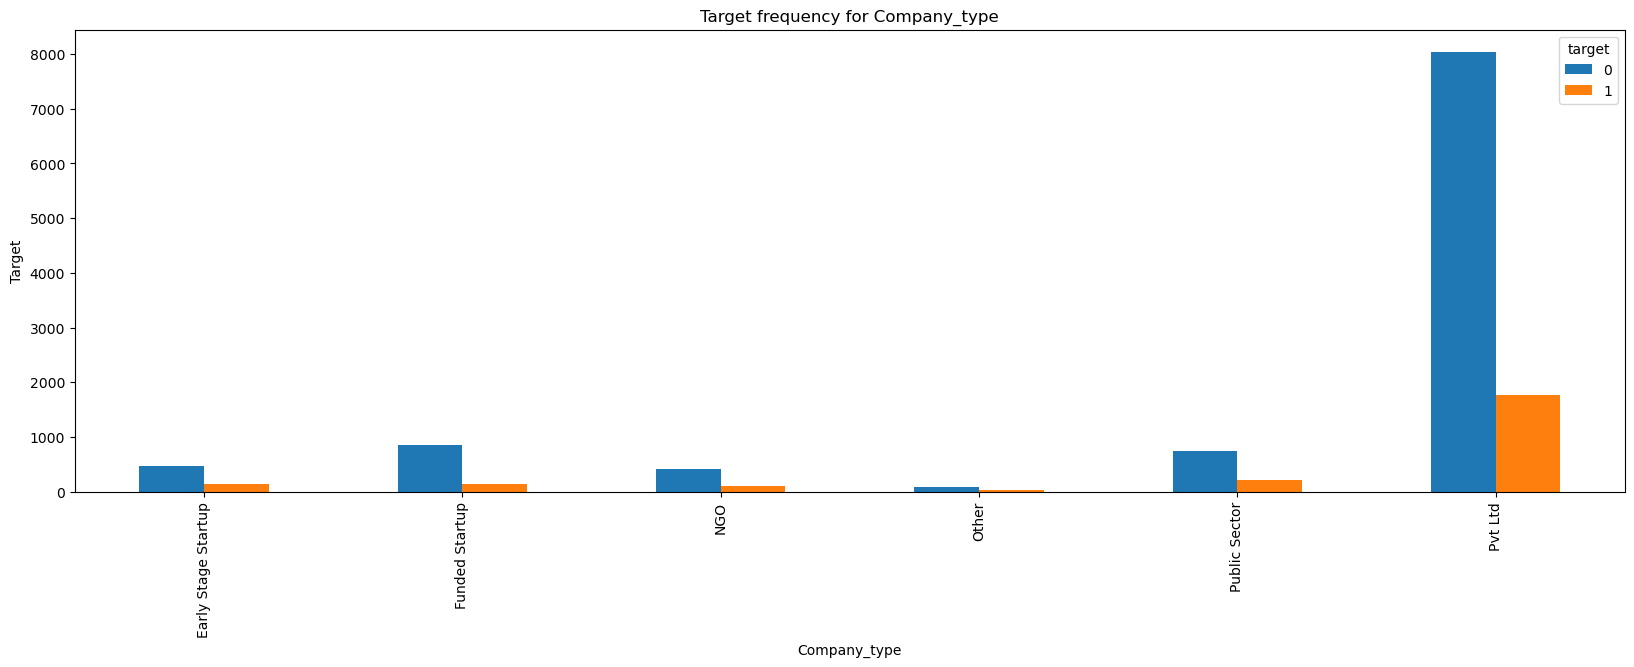

In [140]:
#check the overall distribution of Company_type vs target using crosstab
pd.crosstab(HR.company_type,HR.target).plot(kind="bar",figsize=(20,6))
plt.title('Target frequency for Company_type')
plt.xlabel('Company_type')
plt.ylabel('Target')
plt.savefig('Target according to Company_type.png')#how to save an image in python

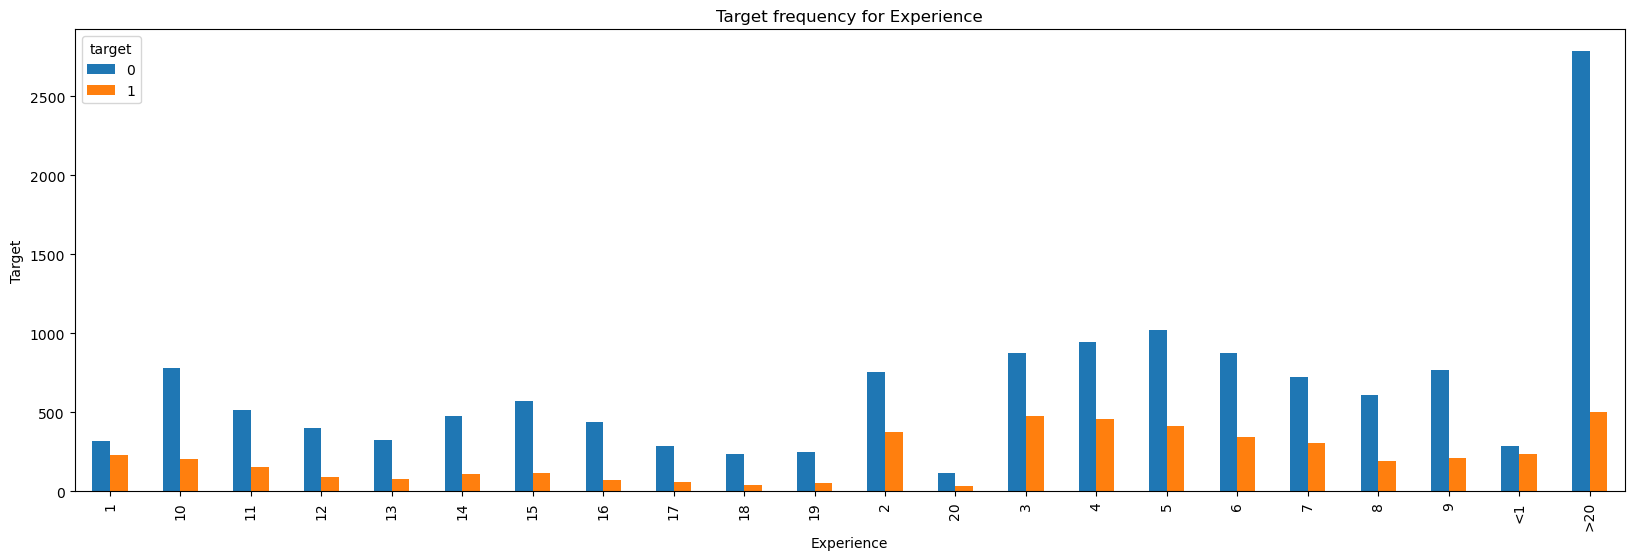

In [141]:
#check the overall distribution of Experience vs target using crosstab
pd.crosstab(HR.experience,HR.target).plot(kind="bar",figsize=(20,6))
plt.title('Target frequency for Experience')
plt.xlabel('Experience')
plt.ylabel('Target')
plt.savefig('Target according to Experience.png')#how to save an image in python

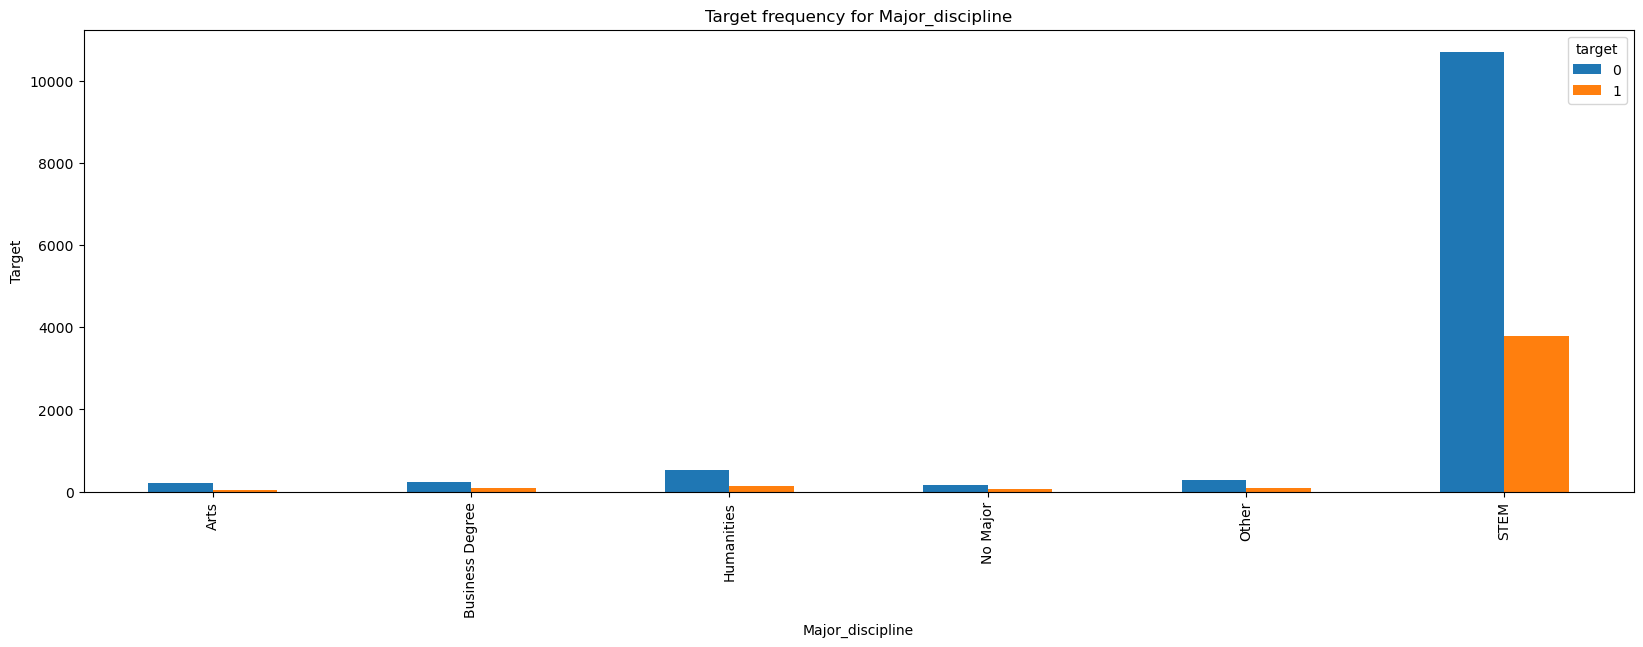

In [142]:
#check the overall distribution of Major_discipline vs target using crosstab
pd.crosstab(HR.major_discipline,HR.target).plot(kind="bar",figsize=(20,6))
plt.title('Target frequency for Major_discipline')
plt.xlabel('Major_discipline')
plt.ylabel('Target')
plt.savefig('Target according to Major_discipline.png')#how to save an image in python

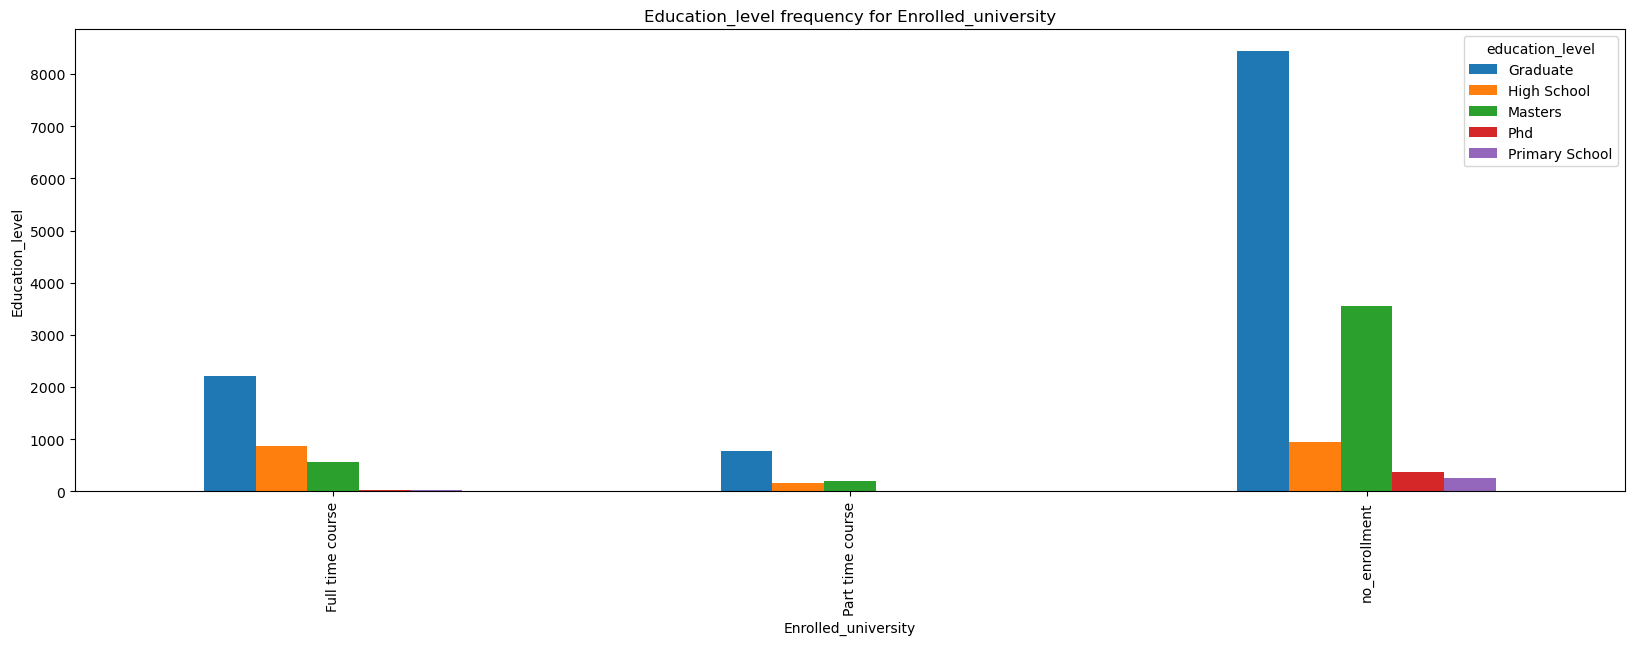

In [143]:
#check the overall distribution of Education_level vs Enrolled_university using crosstab
pd.crosstab(HR.enrolled_university,HR.education_level).plot(kind="bar",figsize=(20,6))
plt.title('Education_level frequency for Enrolled_university')
plt.xlabel('Enrolled_university')
plt.ylabel('Education_level')
plt.savefig('Education_level according to Enrolled_university.png')#how to save an image in python

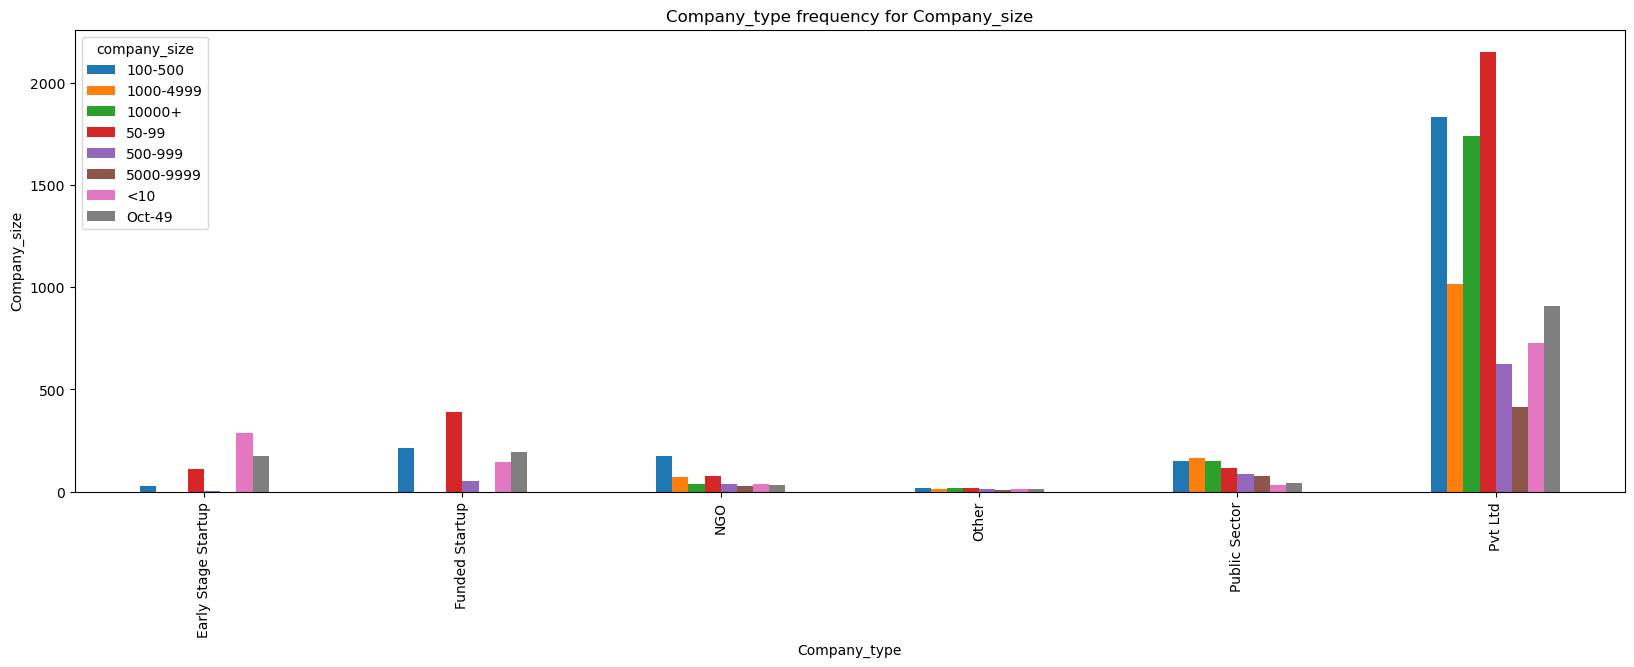

In [144]:
#check the overall distribution of Company_type vs Company_size using crosstab
pd.crosstab(HR.company_type,HR.company_size).plot(kind="bar",figsize=(20,6))
plt.title('Company_type frequency for Company_size')
plt.xlabel('Company_type')
plt.ylabel('Company_size')
plt.savefig('Company_type according to Company_size.png')#how to save an image in python

#check the overall distribution of Enrolled_university vs Major_discipline using crosstab
pd.crosstab(HR.major_discipline,HR.education_level).plot(kind="bar",figsize=(20,6))
plt.title('Education_level frequency for Major_discipline')
plt.xlabel('Major_discipline')
plt.ylabel('Education_level')
plt.savefig('Education_level according to Major_discipline.png')#how to save an image in python

In [145]:
def pie_chart(data,col):
        targets = list(data[col].value_counts().index)
        values = list((data[col].value_counts()*100/len(data[col])).values)
        fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)
        fig.show()

In [146]:
pie_chart(HR,"relevent_experience")

This function uses plotly express(px) to create the pie chart
#

targets = list(data[col].value_counts().index):-This line helps us to get the unique categories(targets) from the specified column of the data frame and stores them in the targets list.

values = list((data[col].value_counts()*100/len(data[col])).values):-This line calculates the percentage of occurences for each category in the specified column and stores them in the values list.

fig = px.pie(values=values, names=targets, color_discrete_sequence=['darkcyan', 'lawngreen'], title=col):- This line creates the pie chart using Plotly Express (px.pie). The values parameter specifies the percentage values for each category, the names parameter specifies the category labels (targets), and the color_discrete_sequence parameter sets the colors for the pie slices. The title parameter sets the title of the pie chart to the name of the column.

fig.show():- This line displays the pie
chart in the Plotly interactive plot window.



In [147]:
pie_chart(HR,"major_discipline")

In [148]:
pie_chart(HR,"education_level")

In [149]:
pie_chart(HR,"training_hours")
#Not applicable for continuous variables.

In [150]:
pie_chart(HR,"city_development_index")
#Not applicable for continuous variables.

In [151]:
categorical_columns = list(HR.select_dtypes(include=['object']).dtypes.index)
print(categorical_columns)
#Not able to get numeric categorical columns of the dataset in this way because its extracting only the object data type.

['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'target']


In [152]:
HR.target.value_counts()

target
0    14381
1     4777
Name: count, dtype: int64

In [153]:
HR.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                     object
dtype: object

In [154]:
HR["target"]=HR["target"].astype(int)

In [155]:
HR.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [156]:
HR.groupby('target').mean(numeric_only=True)

,enrollee_id,city_development_index,training_hours
target,,,
0,16601.160907,0.853139,66.113761
1,17700.819971,0.755719,63.118484


In [157]:
HR.groupby('target').median(numeric_only=True) 

,enrollee_id,city_development_index,training_hours
target,,,
0,16501.0,0.91,48.0
1,18320.0,0.74,46.0


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='target', ylabel='training_hours'>

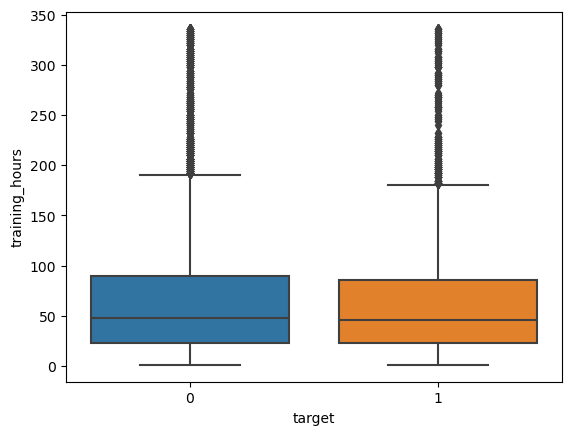

In [158]:
sns.boxplot(x="target",y="training_hours",data=HR)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='target', ylabel='city_development_index'>

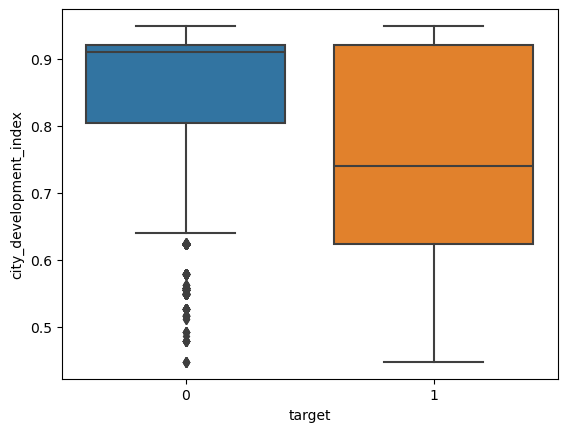

In [159]:
sns.boxplot(x="target",y="city_development_index",data=HR)

In [160]:
HR.education_level.value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [161]:
HR.major_discipline.value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

<Axes: xlabel='major_discipline,education_level'>

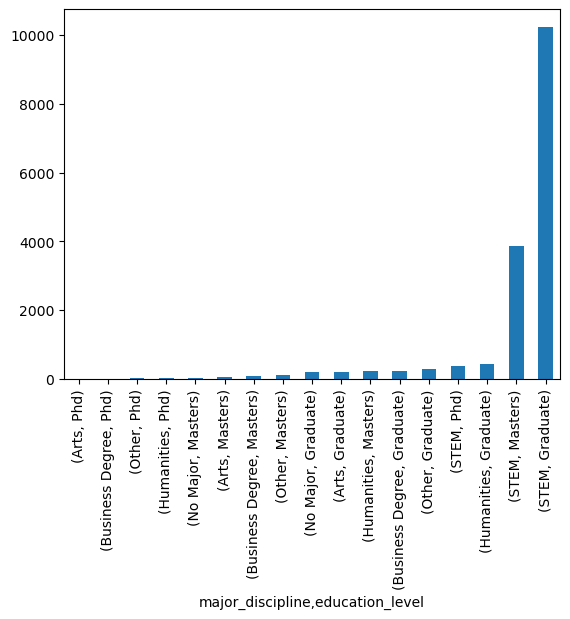

In [162]:
HR[['major_discipline', 'education_level']].value_counts().sort_values().plot(kind='bar')

<Axes: xlabel='relevent_experience,company_type'>

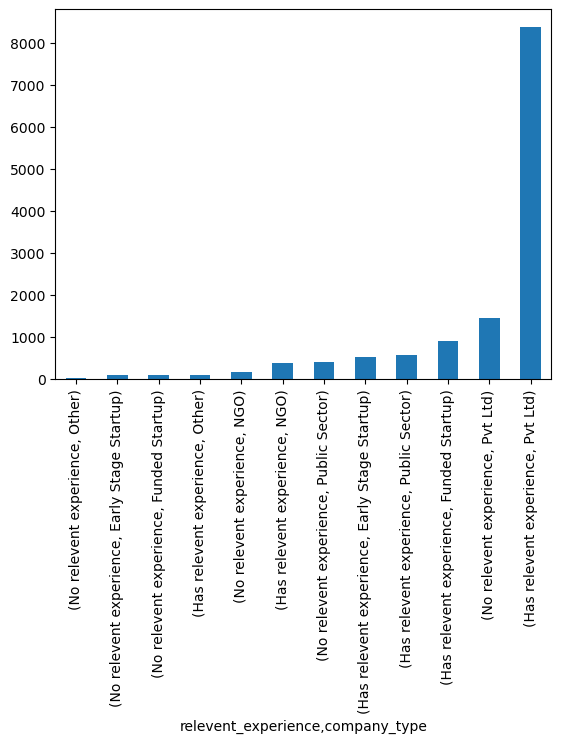

In [163]:
HR[['relevent_experience', 'company_type']].value_counts().sort_values().plot(kind='bar')

In [164]:
numeric_columns = list(HR.select_dtypes(exclude=['object']).dtypes.index)
numeric_columns
#not able to get those continuous columns having object as data type.

['enrollee_id', 'city_development_index', 'training_hours', 'target']

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/158735747.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'skew: 1.8190947994281477')

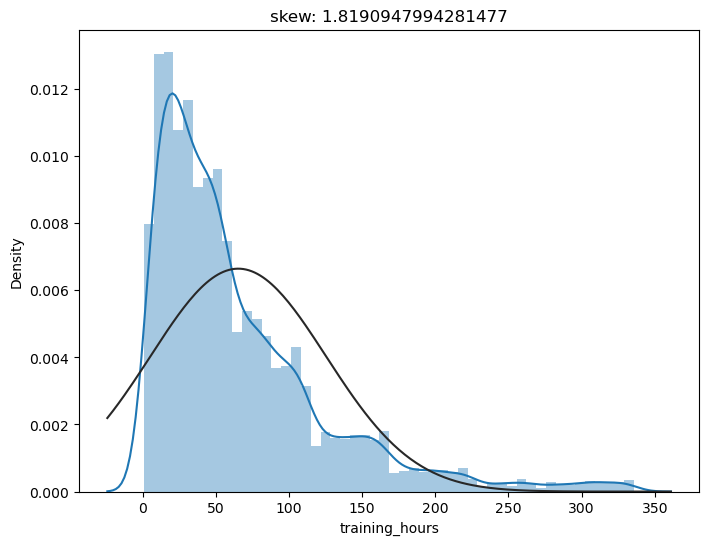

In [165]:
plt.figure(figsize=(8,6))
sns.distplot(HR['training_hours'],fit=norm)# norm shows the normaility curve expected when we have normal distribution
plt.title('skew: {}'.format(skew(HR['training_hours'])))

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/2442655873.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'skew: -0.9953495952364604')

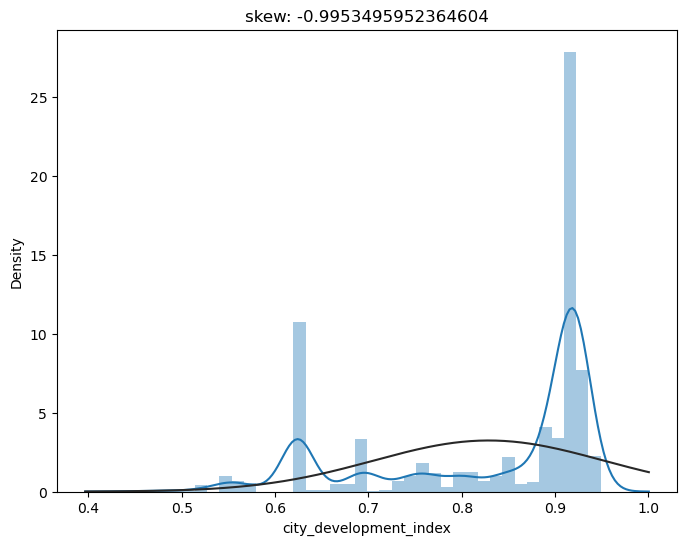

In [166]:
plt.figure(figsize=(8,6))
sns.distplot(HR['city_development_index'],fit=norm)# norm shows the normaility curve expected when we have normal distribution
plt.title('skew: {}'.format(skew(HR['city_development_index'])))

In [167]:
HR.gender.value_counts()

gender
Male      13216
Female     1253
Other       191
Name: count, dtype: int64

In [168]:
HR.gender=HR.gender.fillna("Male")#filling the missing values with mode for gender column

In [169]:
HR.enrolled_university.value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [170]:
HR.enrolled_university=HR.enrolled_university.fillna("Part time course")#filling the missing values with mode for enrolled_university column 

In [171]:
HR.education_level.value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [172]:
#HR.education_level=HR.education_level.fillna("Primary School")#filling the missing values with mode for education_level column 

In [173]:
HR.education_level = HR.education_level.fillna(method='ffill')
#forward fill
#HR.education_level = HR.education_level.fillna(method='bfill')
#backward fill

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/1239413166.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [174]:
HR.major_discipline = HR.major_discipline.fillna(method='ffill')
HR.experience = HR.experience.fillna(method='bfill')
HR.company_size = HR.company_size.fillna(method='ffill')
HR.company_type = HR.company_type.fillna(method='bfill')
HR.last_new_job = HR.last_new_job.fillna(method='ffill')

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/2723166194.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/2723166194.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/2723166194.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/2723166194.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/2723166194.py:5: FutureWarning:

Series.fillna with 'method' is deprecat

In [175]:
HR.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              1
company_type              1
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [176]:
HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0
3,33241,city_115,0.789,Female,No relevent experience,Part time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1
4,666,city_162,0.767,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Oct-49,Pvt Ltd,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Oct-49,Pvt Ltd,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0


In [177]:
HR.company_size = HR.company_size.fillna(method='bfill')
HR.company_type = HR.company_type.fillna(method='ffill')

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/1037774518.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_4451/1037774518.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [178]:
HR.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [179]:
HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0
3,33241,city_115,0.789,Female,No relevent experience,Part time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1
4,666,city_162,0.767,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Oct-49,Pvt Ltd,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Oct-49,Pvt Ltd,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0


In [180]:
HR.last_new_job.value_counts()

last_new_job
1        8217
>4       3362
2        2975
never    2508
4        1055
3        1041
Name: count, dtype: int64

In [181]:
HR.company_size.value_counts()

company_size
50-99        4502
100-500      3765
10000+       2900
Oct-49       2108
1000-4999    1935
<10          1853
500-999      1280
5000-9999     815
Name: count, dtype: int64

In [182]:
HR.gender.value_counts()

gender
Male      17714
Female     1253
Other       191
Name: count, dtype: int64

In [183]:
HR.experience.value_counts()

experience
>20    3294
5      1433
4      1410
3      1362
6      1220
2      1128
7      1031
10      991
9       983
8       805
15      690
11      667
14      588
1       549
<1      524
16      510
12      495
13      399
17      345
19      304
18      282
20      148
Name: count, dtype: int64

In [184]:
ordinal_last_new_job = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}
HR.last_new_job = HR.last_new_job.map(ordinal_last_new_job)

In [185]:
ordinal_company_size = {'<10':0, 'Oct-49':1,'50-99':2, '100-500':3, '500-999':4,'1000-4999':5,'5000-9999':6,'10000+':7}
HR.company_size = HR.company_size.map(ordinal_company_size)

In [186]:
ordinal_experience = {'<1':0, '1':1,'50-99':2, '2':3, '3':4,'4':5,'5':6,'6':7,'7':8,'8':9,'9':10,'10':11,'11':12,'12':13,'13':14,'14':15,'15':16,'16':17,'17':18,'18':19,'19':20,'20':21,'>20':22}
HR.experience = HR.experience.map(ordinal_experience)

In [187]:
HR.relevent_experience.value_counts()

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

In [188]:
le = LabelEncoder()

In [189]:
HR.gender=le.fit_transform(HR['gender'])

In [190]:
le_gender=HR['gender']
gender1=le.fit_transform(le_gender)
gender1

array([1, 1, 0, ..., 1, 1, 1])

In [191]:
#changing from an array to data frame
gender_df=pd.DataFrame(gender1,columns=['gender'])
gender_df

,gender
0,1
1,1
2,0
3,0
4,0
...,...
19153,1
19154,1
19155,1
19156,1


In [192]:
gender_df.value_counts()

gender
1         17714
0          1253
2           191
Name: count, dtype: int64

In [193]:
HR.relevent_experience=le.fit_transform(HR['relevent_experience'])

In [194]:
le_relevent_experience=HR['relevent_experience']
relevent_experience1=le.fit_transform(le_relevent_experience)
relevent_experience1

array([0, 1, 1, ..., 0, 0, 1])

In [195]:
#changing from an array to data frame
relevent_experience_df=pd.DataFrame(relevent_experience1,columns=['relevent_experience'])
relevent_experience_df

,relevent_experience
0,0
1,1
2,1
3,1
4,0
...,...
19153,1
19154,0
19155,0
19156,0


In [196]:
relevent_experience_df.value_counts()

relevent_experience
0                      13792
1                       5366
Name: count, dtype: int64

In [197]:
HR.enrolled_university=le.fit_transform(HR['enrolled_university'])

In [198]:
le_enrolled_university=HR['enrolled_university']
enrolled_university1=le.fit_transform(le_enrolled_university)
enrolled_university1

array([2, 2, 0, ..., 2, 2, 2])

In [199]:
#changing from an array to data frame
enrolled_university_df=pd.DataFrame(enrolled_university1,columns=['enrolled_university'])
enrolled_university_df

,enrolled_university
0,2
1,2
2,0
3,1
4,2
...,...
19153,2
19154,2
19155,2
19156,2


In [200]:
enrolled_university_df.value_counts()

enrolled_university
2                      13817
0                       3757
1                       1584
Name: count, dtype: int64

In [201]:
HR.education_level=le.fit_transform(HR['education_level'])

In [202]:
le_education_level=HR['education_level']
education_level1=le.fit_transform(le_education_level)
education_level1

array([0, 0, 0, ..., 0, 1, 4])

In [203]:
#changing from an array to data frame
education_level_df=pd.DataFrame(education_level1,columns=['education_level'])
education_level_df

,education_level
0,0
1,0
2,0
3,0
4,2
...,...
19153,0
19154,0
19155,0
19156,1


In [204]:
education_level_df.value_counts()

education_level
0                  11890
2                   4469
1                   2063
3                    420
4                    316
Name: count, dtype: int64

In [205]:
HR.major_discipline=le.fit_transform(HR['major_discipline'])

In [206]:
le_major_discipline=HR['major_discipline']
major_discipline1=le.fit_transform(le_major_discipline)
major_discipline1

array([5, 5, 5, ..., 5, 5, 5])

In [207]:
#changing from an array to data frame
major_discipline_df=pd.DataFrame(major_discipline1,columns=['major_discipline'])
major_discipline_df

,major_discipline
0,5
1,5
2,5
3,1
4,5
...,...
19153,2
19154,5
19155,5
19156,5


In [208]:
major_discipline_df.value_counts()

major_discipline
5                   16992
2                     777
4                     448
1                     387
0                     293
3                     261
Name: count, dtype: int64

In [209]:
HR.company_type=le.fit_transform(HR['company_type'])

In [210]:
le_company_type=HR['company_type']
company_type1=le.fit_transform(le_company_type)
company_type1

array([5, 5, 5, ..., 5, 5, 5])

In [211]:
#changing from an array to data frame
company_type_df=pd.DataFrame(company_type1,columns=['company_type'])
company_type_df

,company_type
0,5
1,5
2,5
3,5
4,1
...,...
19153,5
19154,5
19155,5
19156,5


In [212]:
company_type_df.value_counts()

company_type
5               14377
1                1484
4                1414
0                 919
2                 800
3                 164
Name: count, dtype: int64

#we need to concatenate gender_df,company_type_df,major_discipline_df,education_level_df,enrolled_university_df,relevent_experience_df to our original data
data_updated=pd.concat(HR,gender_df,company_type_df,major_discipline_df,education_level_df,enrolled_university_df,relevent_experience_df,axis=1)
data_updated

In [213]:
HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,1,0,2,0,5,22,2,5,1,36,1
1,29725,city_40,0.776,1,1,2,0,5,16,2,5,5,47,0
2,11561,city_21,0.624,0,1,0,0,5,6,2,5,0,83,0
3,33241,city_115,0.789,0,1,1,0,1,0,2,5,0,52,1
4,666,city_162,0.767,0,0,2,2,5,22,2,1,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,1,1,2,0,2,15,1,5,1,42,1
19154,31398,city_103,0.920,1,0,2,0,5,15,1,5,4,52,1
19155,24576,city_103,0.920,1,0,2,0,5,22,2,5,4,44,0
19156,5756,city_65,0.802,1,0,2,1,5,0,4,5,2,97,0


In [214]:
HR.drop('enrollee_id',axis=True)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,1,0,2,0,5,22,2,5,1,36,1
1,city_40,0.776,1,1,2,0,5,16,2,5,5,47,0
2,city_21,0.624,0,1,0,0,5,6,2,5,0,83,0
3,city_115,0.789,0,1,1,0,1,0,2,5,0,52,1
4,city_162,0.767,0,0,2,2,5,22,2,1,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,1,1,2,0,2,15,1,5,1,42,1
19154,city_103,0.920,1,0,2,0,5,15,1,5,4,52,1
19155,city_103,0.920,1,0,2,0,5,22,2,5,4,44,0
19156,city_65,0.802,1,0,2,1,5,0,4,5,2,97,0


In [215]:
HR.city = HR.city.apply(lambda x: int(x.split('_')[1]))
HR.city

0        103
1         40
2         21
3        115
4        162
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 19158, dtype: int64

In [216]:
HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,0,2,0,5,22,2,5,1,36,1
1,29725,40,0.776,1,1,2,0,5,16,2,5,5,47,0
2,11561,21,0.624,0,1,0,0,5,6,2,5,0,83,0
3,33241,115,0.789,0,1,1,0,1,0,2,5,0,52,1
4,666,162,0.767,0,0,2,2,5,22,2,1,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1,1,2,0,2,15,1,5,1,42,1
19154,31398,103,0.920,1,0,2,0,5,15,1,5,4,52,1
19155,24576,103,0.920,1,0,2,0,5,22,2,5,4,44,0
19156,5756,65,0.802,1,0,2,1,5,0,4,5,2,97,0


We are using a lambda function along with the apply function to extract a numeric value from the city column in the data set such that it assumes the city column contains strings in the format city_xx where 'xx' is the numeric value that we want to extract.

In [217]:
#dividing the data set into x and y.
x_encoded=HR.drop('target',axis=1)
y=HR['target']

In [218]:
y

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int64

In [222]:
x_encoded

array([[0.26807274, 0.5698324 , 0.94211577, ..., 1.        , 0.2       ,
        0.10447761],
       [0.89050001, 0.21787709, 0.65469062, ..., 1.        , 1.        ,
        0.13731343],
       [0.34632553, 0.11173184, 0.35129741, ..., 1.        , 0.        ,
        0.24477612],
       ...,
       [0.73624135, 0.5698324 , 0.94211577, ..., 1.        , 0.8       ,
        0.12835821],
       [0.17241379, 0.3575419 , 0.70658683, ..., 1.        , 0.4       ,
        0.28656716],
       [0.7140118 , 0.36871508, 0.81237525, ..., 1.        , 0.2       ,
        0.3761194 ]])

Smote (synthetic minority oversampling technique) is a popular method to pre-process the data in order to address the class imbalance in a dataset.It is particularly useful when dealing with classification problems where one class is significantly under-represented compared to the other(s).


The main idea behind smote is to generate synthetic samples for the minority class by interpolating between existing instances. This helps balance the class distribution & can improve the performance of machine learning models especially when dealing with algorithms that are sensitive to class imbalance.


Here is how smote works:


step1:We identify minority class instances in the dataset. These are the instance that we want to oversample


step2:For each instance in the minority class we select its k nearest neighbours from the same class typically the euclidean distance is used to measure the similarity between instances.


step3:Generate synthetic samples-For each selected instance, we create synthetic samples along the line connecting the instance to its nearest neighbours.The number of synthetic samples generated is determined based on the oversampling ratio required in that scenario.


step4:Add synthetic samples which are newly generated to the dataset, thereby effectively increasing the size of the minority class.


By generating synthetic samples smote helps to improve genralization ability of the machine learning model,reducing the risk of overfitting on the minority class.This can be especially beneficial when the minority class contains critical information that the model might otherwise overlook due to its low representation.

C
|\
| \
|  \
|   \
A----B

Example:

Let's say the feature values of A are (Age = 25, Income = 40000) and the feature values of B are (Age = 28, Income = 45000). 

If the random number "lambda" is 0.6, the synthetic sample C would be calculated as follows:


C_A = A_A + lambda * Diff_A = 25 + 0.6 * (25 - 28) = 23.8


C_B = A_B + lambda * Diff_B = 40000 + 0.6 * (40000 - 45000) = 37000


So, the synthetic sample C has feature values (Age = 23.8, Income = 37000), which lies along the line connecting points A and B.


Repeat for Multiple Neighbors:


This process is repeated for each of the k nearest neighbors of the chosen instance. Each neighbor contributes a synthetic sample, which helps diversify the oversampled dataset.


In summary, SMOTE's interpolation generates synthetic samples by scaling the differences between the chosen instance and its neighbors and adding these scaled differences to the chosen instance's feature values. This creates new samples along the lines connecting the chosen instance and its neighbors, effectively expanding the feature space and introducing variety to the minority class samples.

Given:

Chosen instance A: Age = 25, Income = 40000


Neighbor instance B: Age = 28, Income = 45000


Random number lambda: 0.6


Calculate the Differences (Diff_A, Diff_B):

Difference in Age: Diff_A = A_A - B_A = 25 - 28 = -3


Difference in Income: Diff_B = A_B - B_B = 40000 - 45000 = -5000


Scale the Differences with Lambda:


Scale the difference in Age: Lambda * Diff_A = 0.6 * (-3) = -1.8


Scale the difference in Income: Lambda * Diff_B = 0.6 * (-5000) = -3000


Add Scaled Differences to Chosen Instance (A):


New Age value (C_A): A_A + Lambda * Diff_A = 25 + (-1.8) = 23.8


New Income value (C_B): A_B + Lambda * Diff_B = 40000 + (-3000) = 37000


So, the synthetic sample C will have the feature values:


Age = 23.8


Income = 37000


These new feature values represent the synthetic sample that is generated through the interpolation process along the line connecting the chosen instance A and its neighbor B. The interpolation creates a new point C that lies between instances A and B in the feature space.


The purpose of this interpolation is to introduce diversity into the oversampled dataset, helping the model generalize better and making the synthetic samples more representative of the minority class distribution.

In [224]:
num_before=dict(Counter(y))
num_before

{1: 4777, 0: 14381}

In [225]:
smote=SMOTE()#saving the instance

In [226]:
x_smote,y_smote=smote.fit_resample(x_encoded,y)

In [227]:
num_after=dict(Counter(y_smote))
num_after

{1: 14381, 0: 14381}

In [228]:
after_smote=list(num_after.values())

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/sou

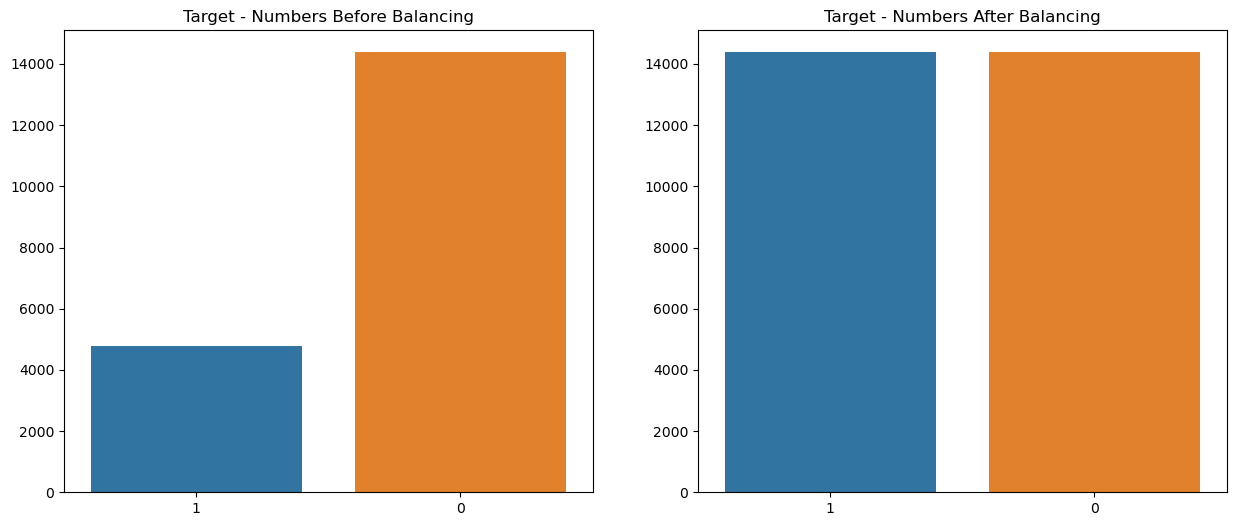

In [229]:
labels = ["1","0"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Target - Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=after_smote)
plt.title("Target - Numbers After Balancing")
plt.show()

In [230]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=0)

In [238]:
x_train,x_test,y_train,y_test

(array([[0.87588004, 0.11173184, 0.35129741, ..., 1.        , 0.2       ,
         0.22985075],
        [0.96003475, 0.88826816, 0.94211577, ..., 1.        , 0.2       ,
         0.01791045],
        [0.49030828, 0.11173184, 0.35129741, ..., 1.        , 0.2       ,
         0.12835821],
        ...,
        [0.10470655, 0.5698324 , 0.94211577, ..., 1.        , 0.        ,
         0.14029851],
        [0.58288145, 0.11173184, 0.35129741, ..., 1.        , 0.2       ,
         0.22089552],
        [0.71853561, 0.08379888, 0.92215569, ..., 1.        , 0.2       ,
         0.00597015]]),
 array([[0.00943707, 0.05586592, 0.20359281, ..., 1.        , 0.        ,
         0.1641791 ],
        [0.79340304, 0.75418994, 0.89620758, ..., 1.        , 0.2       ,
         0.16716418],
        [0.74711645, 0.11173184, 0.35129741, ..., 1.        , 0.4       ,
         0.1641791 ],
        ...,
        [0.91840988, 0.24729983, 0.64113988, ..., 1.        , 0.2       ,
         0.02088444],
        [0.4

In [231]:
#Feature Scaling on x data(x_train & x_test)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [232]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', XGBClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [233]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.6930297236224578
Naive bayes : 0.6686945941248045
CART : 0.765513645054754
Random Forest : 0.8593777159742743
SVM : 0.6944203024508951


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



XGBoost : 0.8463410394576742
GradientBoosting : 0.8171388840604902


In [234]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision = precision_score(y_test, y_pred)*100
        print('Precision_score')
        print("{} : {:.2f}%".format(name,precision))

Precision_score
Logistic Regression : 71.38%
Precision_score
Naive bayes : 67.40%
Precision_score
CART : 76.51%
Precision_score
Random Forest : 86.34%
Precision_score
SVM : 71.96%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Precision_score
XGBoost : 87.53%
Precision_score
GradientBoosting : 85.29%


In [235]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        recall = recall_score(y_test, y_pred)*100
        print('Recall_score')
        print("{} : {:.2f}%".format(name,recall))

Recall_score
Logistic Regression : 65.28%
Recall_score
Naive bayes : 66.38%
Recall_score
CART : 77.17%
Recall_score
Random Forest : 85.66%
Recall_score
SVM : 64.52%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Recall_score
XGBoost : 81.07%
Recall_score
GradientBoosting : 77.00%


In [236]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        f1 = f1_score(y_test, y_pred)*100
        print('f1_score')
        print("{} : {:.2f}%".format(name,f1))

f1_score
Logistic Regression : 68.19%
f1_score
Naive bayes : 66.89%
f1_score
CART : 76.84%
f1_score
Random Forest : 86.00%
f1_score
SVM : 68.04%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



f1_score
XGBoost : 84.17%
f1_score
GradientBoosting : 80.94%


In [237]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        confusion = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,confusion))
        print('----------------------------------')

Logistic Regression : [[2094  759]
 [1007 1893]]
----------------------------------
Naive bayes : [[1922  931]
 [ 975 1925]]
----------------------------------
CART : [[2166  687]
 [ 662 2238]]
----------------------------------
Random Forest : [[2460  393]
 [ 416 2484]]
----------------------------------
SVM : [[2124  729]
 [1029 1871]]
----------------------------------


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



XGBoost : [[2518  335]
 [ 549 2351]]
----------------------------------
GradientBoosting : [[2468  385]
 [ 667 2233]]
----------------------------------


In [239]:
#applying decision tree with hyper parameter tuning
dt_classifier = DecisionTreeClassifier()

In [240]:
param_grid = {
    'max_depth': [None, 5, 10, 15],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [241]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

In [242]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [243]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [244]:
#we are creating a new decision tree classifier with the best hyper parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5)

In [245]:
y_pred_tune=best_dt_classifier.predict(x_test)
y_pred_tune

array([1, 0, 1, ..., 1, 0, 1])

In [246]:
accuracy_decision_tune= accuracy_score(y_test, y_pred_tune)
accuracy_decision_tune

0.7609942638623327

In [247]:
train_score_decision_tune=best_dt_classifier.score(x_train,y_train)
train_score_decision_tune

0.8391498978660524

In [248]:
test_score_decision_tune=best_dt_classifier.score(x_test,y_test)
test_score_decision_tune

0.7609942638623327

In [249]:
#decision tree with hyper parameter tuning model gives an accuracy score of 78.68% with a good fit hence finding out the evaluation metrics for this model.
recall_decision = recall_score(y_test, y_pred_tune)*100
recall_decision

71.17241379310344

In [250]:
precision_decision = precision_score(y_test, y_pred_tune)*100
precision_decision

79.29312331924703

In [251]:
f1_decision = f1_score(y_test, y_pred_tune)*100
f1_decision

75.01362892967472

In [252]:
confusion_decision = confusion_matrix(y_test, y_pred_tune)
confusion_decision

array([[2314,  539],
       [ 836, 2064]])

In [253]:
classification_report__decision=classification_report(y_test, y_pred_tune)
print(classification_report__decision)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2853
           1       0.79      0.71      0.75      2900

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.76      5753
weighted avg       0.76      0.76      0.76      5753

